In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *

In [61]:
# raw data
team_data_2023_raw = pd.read_csv('data/2023_FBRef_teams.csv', index_col=0)
team_data_2023_raw.index = team_data_2023_raw.index + '_2023'
team_data_2022_raw = pd.read_csv('data/2022_FBRef_teams.csv', index_col=0)
team_data_2022_raw.index = team_data_2022_raw.index + '_2022'

In [75]:
team_data_raw = pd.concat([team_data_2022_raw, team_data_2023_raw])

In [81]:
from sklearn.preprocessing import MinMaxScaler
team_data_scaled = MinMaxScaler().fit_transform(team_data_raw)
team_data_scaled = pd.DataFrame(team_data_scaled, index=team_data_raw.index, columns=team_data_raw.columns)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

similarity_matrix_raw = cosine_similarity(team_data_scaled)
# similarity_matrix_raw = euclidean_distances(team_data_2023_scaled)
similarity_matrix_raw = pd.DataFrame(similarity_matrix, index=team_data_scaled.index, columns=team_data_scaled.index)

In [83]:
similarity_matrix_raw.loc['Liverpool_2023'].sort_values(ascending=False)[1:21]
# similarity_matrix_raw.loc['Liverpool'].sort_values(ascending=True)[1:21]

_Squad_
Arsenal_2023            0.976934
Napoli_2023             0.972112
Liverpool_2022          0.967255
Brighton_2022           0.967188
Arsenal_2022            0.967018
Bayern Munich_2022      0.964261
Barcelona_2023          0.961416
Napoli_2022             0.960490
RB Leipzig_2023         0.959272
Milan_2023              0.955720
Lille_2022              0.953383
Bayern Munich_2023      0.950991
RB Leipzig_2022         0.949895
Athletic Club_2022      0.949302
Stuttgart_2023          0.946792
Barcelona_2022          0.945898
Newcastle Utd_2022      0.944780
Leverkusen_2023         0.944184
Manchester City_2022    0.943815
Juventus_2023           0.941785
Name: Liverpool_2023, dtype: float64

<Axes: >

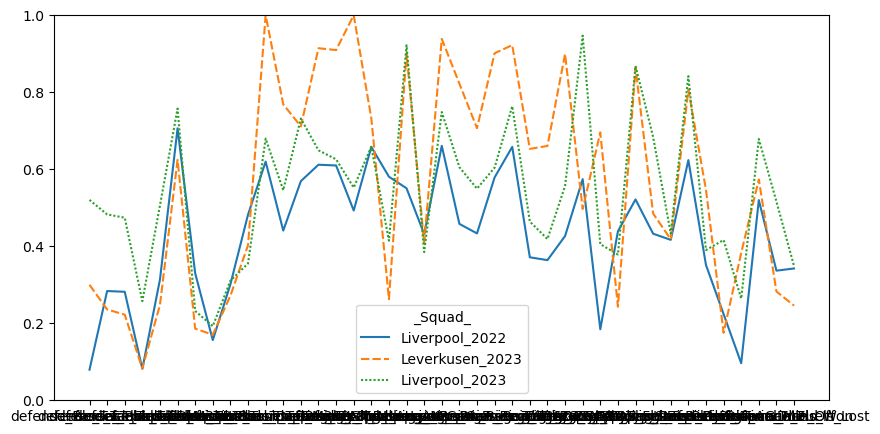

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
sns.lineplot(data=team_data_scaled.loc[['Liverpool_2022', 'Leverkusen_2023', 'Liverpool_2023']].T, ax=ax)

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [98]:
team_data_pca = pd.DataFrame(index=team_data_scaled.index)
pca_types_dict = {}

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(team_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        team_data_pca[pca_names] = pca_result

<Axes: >

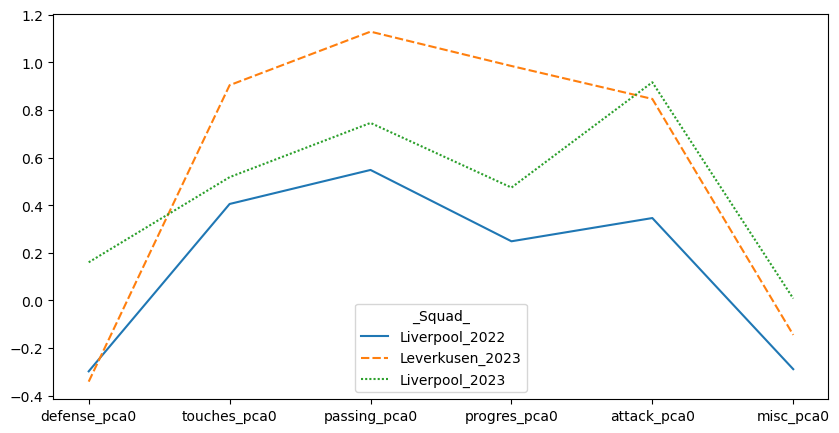

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
# ax.set_ylim(0,1)
sns.lineplot(data=team_data_pca.loc[['Liverpool_2022', 'Leverkusen_2023', 'Liverpool_2023']].T, ax=ax)